### Notebook for running SONATA on scGEM dataset
Below, we replicate our results for scGEM dataset reported in *Securing diagonal integration of multimodal single-cell data against ambiguous mapping*




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize

import sys
sys.path.insert(1, '../src/')
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

In [2]:
# load parameters and datasets
with open("./cfgs/scGEM.yaml", "r") as file:
        params = yaml.safe_load(file)
        
data_url1 = os.path.join(params["data_path"], params["data_url1"])
data_url2 = os.path.join(params["data_path"], params["data_url2"])
print("data url1 = {}\ndata url2 = {}".format(data_url1, data_url2))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params["data_path"], params["label_url1"])
label_url2 = os.path.join(params["data_path"], params["label_url2"])
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

# create links for FOSCTTM, all datasets follow 1-1 correspondence
links = np.array(list(zip([i for i in range(data1.shape[0])], [i for i in range(data2.shape[0])])))

if params["norm"]: 
        data1 = normalize(data1, norm=params["norm"])
        data2 = normalize(data2, norm=params["norm"])

if params["sort"]: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)
        
save_path = params["save_dir"]
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


data url1 = ../data/scGEM/scGEM_expression.csv
data url2 = ../data/scGEM/scGEM_methylation.csv
data size: data1 = (177, 34), data2 = (177, 27)
data1 shape=(177, 34)	data2 shape=(177, 27)
label1 shape=(177,)	label2 shape=(177,)


### 1. visualize two modalities

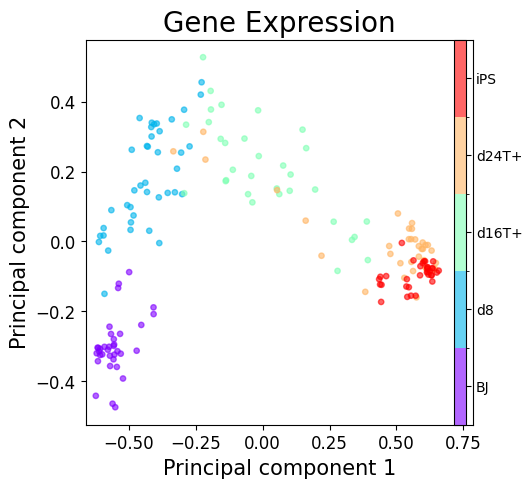

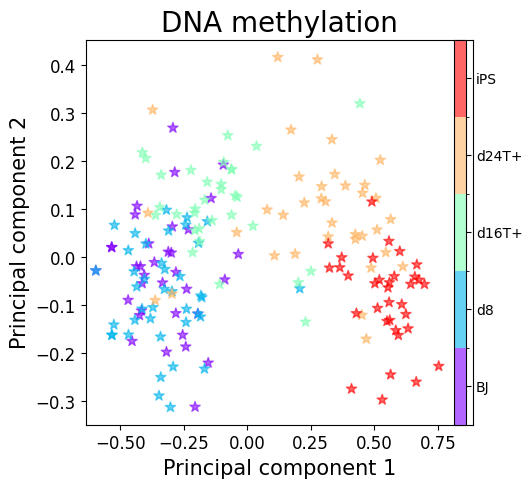

In [3]:
plt_domain_bio_labels(data1, label1, title="Gene Expression", y_tick_labels=["BJ", "d8", "d16T+", "d24T+", "iPS"], marker='.', a=0.6, show=True)
plt_domain_bio_labels(data2, label2, title="DNA methylation", y_tick_labels=["BJ", "d8", "d16T+", "d24T+", "iPS"], marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

##### 2.1 Diagnose Modality1

In [4]:
sn1 = sonata.sonata(params)
DiagnoseResult1 = sn1.diagnose(data1, save_dir=os.path.join(params['save_dir'], "Modality1"))

/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


---------------Coupling Denoising Iter=0--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter0.txt
---------------Coupling Denoising Iter=1--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter1.txt
---------------Coupling Denoising Iter=2--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter2.txt
---------------Coupling Denoising Iter=3--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter3.txt
---------------Coupling Denoising Iter=4--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter4.txt
---------------Coupling Denoising Iter=5--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_iter5.txt
---------------Coupling Denoising Iter=6--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality1/coupling_iters/coupling_it

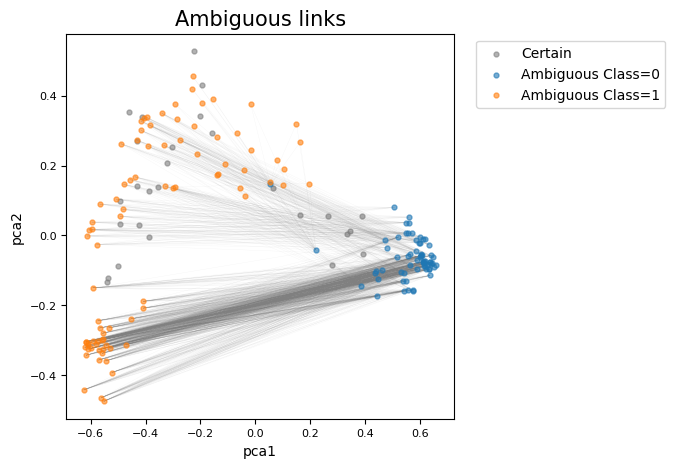

In [5]:
plt_cannotlink_by_labelcolor(data1, DiagnoseResult1.ambiguous_idx, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

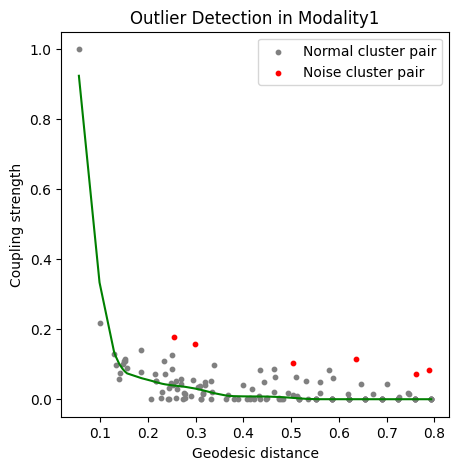

In [6]:
scatter_x = sn1.spline_data.spline_dist
scatter_y = sn1.spline_data.spline_coupling
include_indices = sn1.spline_data.include_indices
exclude_indices = sn1.spline_data.exclude_indices
spline_x = sn1.spline_data.spline_x
spline_y = sn1.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality1", show=True)

#### 2.2 Diagnose Modality 2

In [7]:
sn2 = sonata.sonata(params)
DiagnoseResult2 = sn2.diagnose(data2, save_dir=os.path.join(params['save_dir'], "Modality2"))

/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


---------------Coupling Denoising Iter=0--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter0.txt
---------------Coupling Denoising Iter=1--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter1.txt
---------------Coupling Denoising Iter=2--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter2.txt
---------------Coupling Denoising Iter=3--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter3.txt
---------------Coupling Denoising Iter=4--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter4.txt
---------------Coupling Denoising Iter=5--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_iter5.txt
---------------Coupling Denoising Iter=6--------------
Load_path = ../results/sonata_pipeline/scGEM/Modality2/coupling_iters/coupling_it

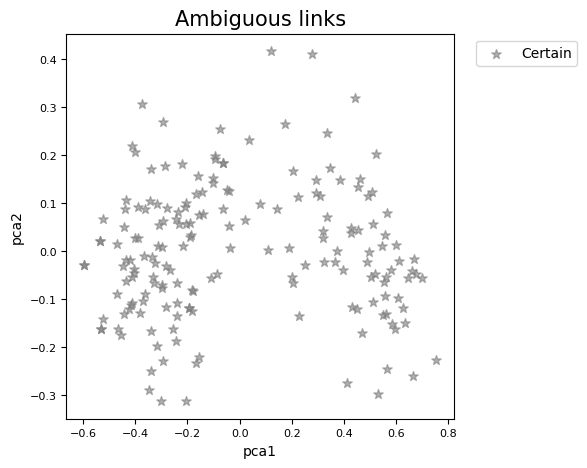

In [8]:
plt_cannotlink_by_labelcolor(data2, DiagnoseResult2.ambiguous_idx, DiagnoseResult2.ambiguous_labels, DiagnoseResult2.cannot_links, alpha=0.6, cl_alpha = 0.1, marker='*', show=True)

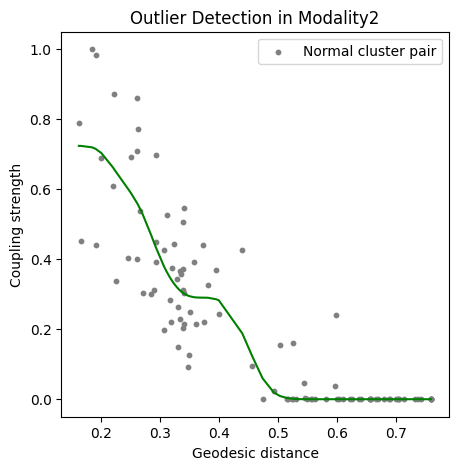

In [9]:
scatter_x = sn2.spline_data.spline_dist
scatter_y = sn2.spline_data.spline_coupling
include_indices = sn2.spline_data.include_indices
exclude_indices = sn2.spline_data.exclude_indices
spline_x = sn2.spline_data.spline_x
spline_y = sn2.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality2", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

It.  |Err         
-------------------
    0|1.067314e-02|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|6.317297e-03|
   20|2.083472e-03|
   30|2.892674e-03|
   40|2.372450e-03|
   50|1.169048e-03|
   60|1.437731e-03|
   70|5.572601e-04|
   80|4.110582e-04|
   90|4.131393e-04|
  100|1.963971e-04|
  110|7.256699e-05|
  120|3.852772e-05|
  130|2.448873e-05|
  140|1.666769e-05|
  150|1.157487e-05|
  160|8.053178e-06|
  170|5.580261e-06|
  180|3.846757e-06|
  190|2.639673e-06|
It.  |Err         
-------------------
  200|1.804991e-06|
  210|1.231131e-06|
  220|8.382770e-07|
  230|5.701429e-07|
  240|3.875021e-07|
  250|2.632577e-07|
  260|1.788072e-07|
  270|1.214329e-07|
  280|8.246444e-08|
  290|5.600077e-08|
  300|3.803016e-08|
  310|2.582701e-08|
  320|1.754016e-08|
  330|1.191259e-08|
  340|8.090802e-09|
  350|5.495255e-09|
  360|3.732447e-09|
  370|2.535172e-09|
  380|1.721979e-09|
  390|1.169644e-09|
It.  |Err         
-------------------
  400|7.944820e-10|


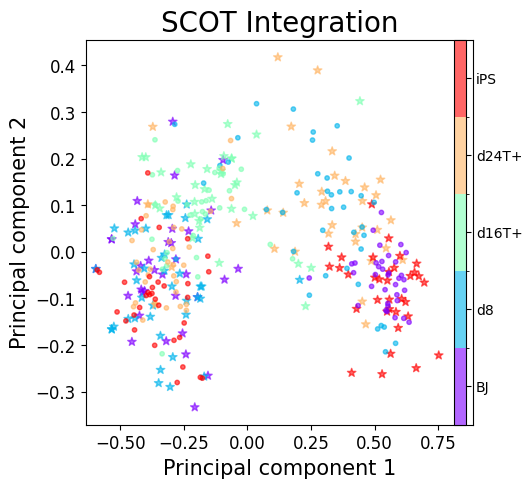

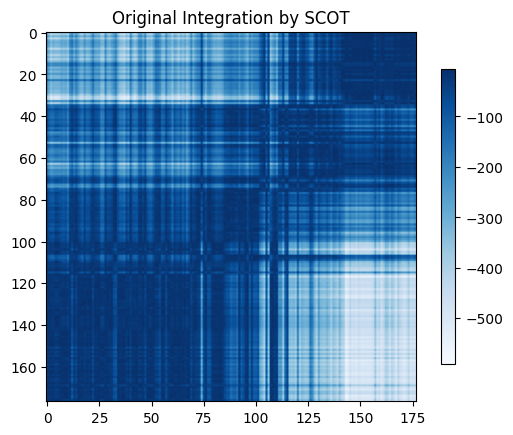

In [10]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = 20, e=1e-3, mode=params["scot_mode"], metric=params["scot_metric"], normalize=params["norm"])
mapping = scot.coupling
            
plt_mapping_bio_labels(x_aligned, y_aligned, label1, label2, "Gene Expression", "DNA methylation", ["BJ", "d8", "d16T+", "d24T+", "iPS"], suptitle = "SCOT Integration", a = 0.6, show=True)  
plt_heatmap(np.log(mapping), title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

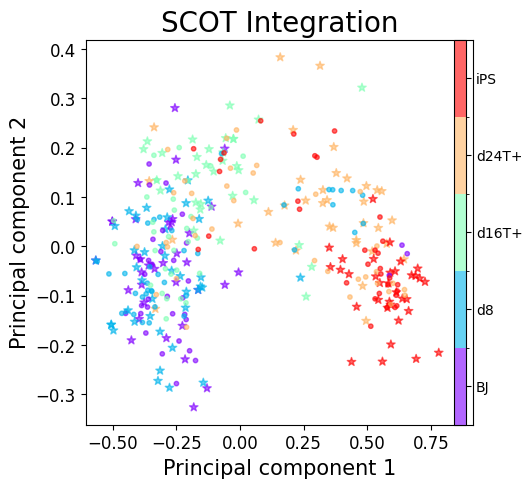

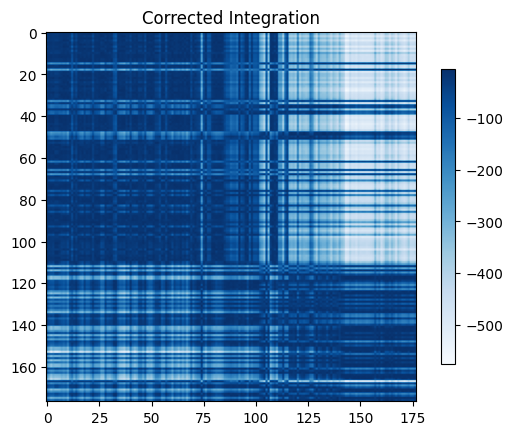

In [12]:
# check modality 1
alter_mappings = sonata.map_ambiguous_groups(data1, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.ambiguous_idx)
x_aligned_best, y_aligned_best, best_mapping, _ = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping)

plt_mapping_bio_labels(x_aligned_best, y_aligned_best, label1, label2, "Gene Expression", "DNA methylation", ["BJ", "d8", "d16T+", "d24T+", "iPS"], suptitle = "SCOT Integration", a = 0.6, show=True)  
plt_heatmap(np.log(best_mapping), title="Corrected Integration", show=True)